# A Camera Calibration Code
### Here we use either of the two following methods to calculate camera intrinsics and distortion coefficients. Finally we undistort the original images and compare the results
- Read in the images captured from a checkerboard pattern stored in a separate folder 
- Read in a video that is captured while the camera is hovering around the checkerboard for 10-15 seconds


In [1]:
import pandas as pd
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook
import json
import cv2
import glob

## The main directory

In [2]:
#dataPath = "/home/kamran/Documents/2019_11_20_KB_Pilot_3/001/"
dataPath = "/hdd01/kamran_sync/lab/students/kamran/Camera Quality Tests/"
#clip = VideoFileClip(dataPath + 'depth.mp4')
#clip.ipython_display(width = 280)

## Play the recorded video (hit q to exit)

In [3]:
#cap = cv2.VideoCapture(dataPath + 'world.mp4')
cap = cv2.VideoCapture(dataPath + 'my_video-2.mkv')


while(cap.isOpened()):
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## 1. Read Images

In [4]:
currentDirectory = os.getcwd() + "/oCam-Images/"
print('directory :\n', currentDirectory)
fileNames = os.listdir(currentDirectory)
print('number of images : ',len(fileNames))
print('fileNames = \n', fileNames)

directory :
 /hdd01/kamran_sync/lab/students/kamran/Camera Quality Tests/oCam-Images/
number of images :  24
fileNames = 
 ['my_photo-19.jpg', 'my_photo-20.jpg', 'my_photo-2.jpg', 'my_photo-9.jpg', 'my_photo-7.jpg', 'my_photo-17.jpg', 'my_photo-6.jpg', 'my_photo-22.jpg', 'my_photo-24.jpg', 'my_photo-3.jpg', 'my_photo-23.jpg', 'my_photo-12.jpg', 'my_photo-16.jpg', 'my_photo-18.jpg', 'my_photo-15.jpg', 'my_photo-13.jpg', 'my_photo-11.jpg', 'my_photo-5.jpg', 'my_photo-14.jpg', 'my_photo-21.jpg', 'my_photo-8.jpg', 'my_photo-4.jpg', 'my_photo-10.jpg', 'my_photo-1.jpg']


### Find checkerboard, calculate the corner points, run the refinement and store them into _imgpoints_

In [5]:



# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((8*6,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

#images = glob.glob('*.jpg')
 
count = 0
for fname in fileNames:
    img = cv2.imread(currentDirectory+fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        print('====> Found[%d]!' %(count))
        count = count + 1
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (8,6), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(200)
    else:
        print('No Chessboard!')
        #cv2.imshow('not Found!',img)

        #if cv2.waitKey(1000) & 0xFF == ord('q'):
        #    break

cv2.destroyAllWindows()

No Chessboard!
====> Found[0]!
No Chessboard!
====> Found[1]!
====> Found[2]!
====> Found[3]!
====> Found[4]!
====> Found[5]!
====> Found[6]!
No Chessboard!
====> Found[7]!
====> Found[8]!
====> Found[9]!
====> Found[10]!
====> Found[11]!
====> Found[12]!
====> Found[13]!
====> Found[14]!
No Chessboard!
====> Found[15]!
====> Found[16]!
====> Found[17]!
====> Found[18]!
====> Found[19]!


## 2. Read Video


### The same proccess only on the video frame 
### - _TODO_ : Make this a function and call based on a flag

In [ ]:

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((8*6,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

#images = glob.glob('*.jpg')

#cap = cv2.VideoCapture(dataPath + 'world.mp4')
cap = cv2.VideoCapture(dataPath + 'my_video-2.mkv')

count = 0
while(cap.isOpened()):
#for count in range(2800,3600):
    time_length = 91.0
    fps=30
    frame_seq = 2730
    #frame_no = (frame_seq /(time_length*fps))
    frame_no = (count /(time_length*fps))

    #The first argument of cap.set(), number 2 defines that parameter for setting the frame selection.
    #Number 2 defines flag CV_CAP_PROP_POS_FRAMES which is a 0-based index of the frame to be decoded/captured next.
    #The second argument defines the frame number in range 0.0-1.0
    #print(count)
    
    # Uncomment this line if you want to only search for a certain frame number
    #cap.set(1,count);

    #Read the next frame from the video. If you set frame 749 above then the code will return the last frame.
    ret, img = cap.read()
    if ret == False:
        print('End of video frames!')
        break

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (6,8),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        print('====> Found[%d]!' %(count))
        count = count + 1
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (6,8), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(1)
    else:
        #print('No Chessboard[%d]!'%(count))
        #cv2.imshow('not Found!',img)

        #if cv2.waitKey(1) & 0xFF == ord('q'):
        #    break

cv2.destroyAllWindows()

### Calculate the:
- Camera matrix (mtx)
- distortion coefficients (dist)
- rotation and translation vectors (for each image w.r.t bottom left corner) (rvecs, tvecs)
- re-projection error (ret)

In [6]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
#ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints[::2], imgpoints[::2], gray.shape[::-1],None,None)

In [7]:
ret

1.184649801219208

\begin{equation*}
\mathbf{Camera \ Matrix = }
\begin{pmatrix} 
{f_x} & {0} & {c_x}\\
{0}  & {f_y} & {c_y}\\
{0} & {0} & {1}
\end{pmatrix}
\end{equation*}

In [8]:
mtx

array([[962.06114864,   0.        , 605.18650267],
       [  0.        , 962.81936769, 460.51473   ],
       [  0.        ,   0.        ,   1.        ]])

\begin{equation*}
\mathbf{Distortion \  Coefficient = }
\begin{pmatrix} 
{k_1} & {k_2} & {p_1} & {p_2} & {k_3}
\end{pmatrix}
\end{equation*}

In [9]:
dist

array([[-0.46046016,  0.29048304,  0.00302874,  0.00144023, -0.1114229 ]])

In [10]:
rvecs

[array([[ 0.24888034],
        [-0.20505004],
        [ 0.11095389]]), array([[-0.10625961],
        [ 0.66319989],
        [-0.01643159]]), array([[ 0.24247998],
        [-0.10942519],
        [ 1.37959201]]), array([[-0.66370753],
        [-0.31998523],
        [-0.12098755]]), array([[0.27164595],
        [0.01650954],
        [1.54598084]]), array([[-0.1246197 ],
        [ 0.15443482],
        [-0.01522427]]), array([[-0.18286847],
        [-0.9599682 ],
        [ 0.83080229]]), array([[-0.17520856],
        [-0.24832076],
        [ 0.00903978]]), array([[ 0.64259583],
        [-0.02214001],
        [-0.20314397]]), array([[-1.15734631],
        [-0.00554714],
        [-0.01752074]]), array([[0.01317516],
        [0.73448265],
        [0.2974623 ]]), array([[-0.57336533],
        [ 0.60048785],
        [-0.21004186]]), array([[ 0.4301921 ],
        [-0.44582002],
        [-0.57560601]]), array([[-0.86818286],
        [-0.06909507],
        [ 0.0995228 ]]), array([[ 0.00568486],
   

In [11]:
tvecs

[array([[-12.12176561],
        [ -9.46342308],
        [ 17.00516764]]), array([[-4.43508123],
        [-2.60467204],
        [13.07607252]]), array([[ 2.81395512],
        [-2.76772862],
        [ 9.82805624]]), array([[-3.30126516],
        [-2.00863003],
        [ 8.99385252]]), array([[ 4.05169939],
        [-3.44291794],
        [10.05877344]]), array([[ 1.4754302 ],
        [-0.1048355 ],
        [12.53270151]]), array([[-3.05116864],
        [-2.29105839],
        [13.17832778]]), array([[-7.96498887],
        [ 0.81463674],
        [12.24259617]]), array([[-2.90905174],
        [-0.34663902],
        [11.40704604]]), array([[-3.14878236],
        [ 2.32940141],
        [14.56479171]]), array([[-1.94086494],
        [-3.7533986 ],
        [11.92813107]]), array([[-3.17914675],
        [-0.6347606 ],
        [14.51068556]]), array([[-2.20861551],
        [-0.58166997],
        [13.84805026]]), array([[-2.71564129],
        [-2.68611792],
        [13.24075922]]), array([[-2.02298

## Calculate the new Camera Matrix and undistort the images accordingly

0 0 1280 960


<IPython.core.display.Javascript object>


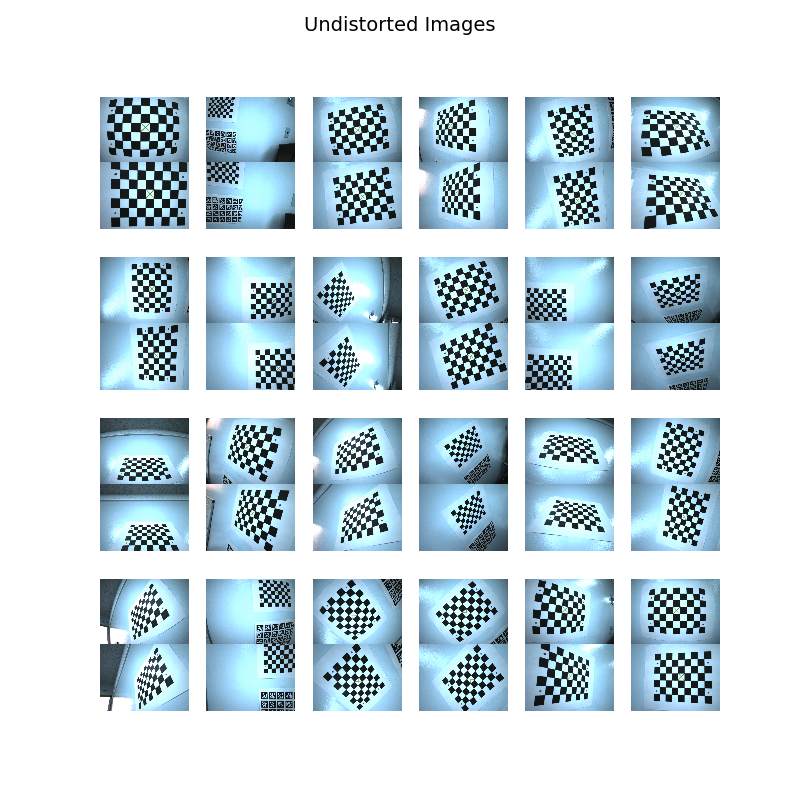

In [16]:
h,  w = gray.shape
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),0,(w,h))
# crop the image if needed!
x,y,w,h = roi
print (x,y,w,h)

fig = plt.figure(figsize=(8,8))
fig.suptitle('Undistorted Images', fontsize = 14)

fourcc = 'XVID'
size = (w*2, h)
out = cv2.VideoWriter(dataPath + 'undistorted_3.avi',cv2.VideoWriter_fourcc(*fourcc), 1, size)

count = 1
for fname in fileNames:
    img = cv2.imread(currentDirectory+fname)
    #upsampled = cv2.resize(gray, None, fx = 4, fy = 4)
    #img = upsampled
    #print(img.shape)
    # undistort
    dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

    # crop the image if needed!
    x,y,w,h = roi
    dst = dst[y:y+h, x:x+w]
    
    #dst = cv2.resize(gray, None, fx = .25, fy = .25)
    #print(dst.shape)
    #plt.figure(figsize=(4,2))
    cv2.imwrite(dataPath + '/undistortedImages/undist_' + fname, dst)
    plt.subplot(4,6,count)
    #plt.title('Undistorting' + fname)
    plt.imshow(np.vstack((img,dst)))
    plt.axis('off')
    count = count + 1
    #plt.close()

 
    out.write(np.hstack((img,dst)))
out.release()
#plt.close()

In [17]:
plt.close()

## show one undistorted image as an example

<IPython.core.display.Javascript object>


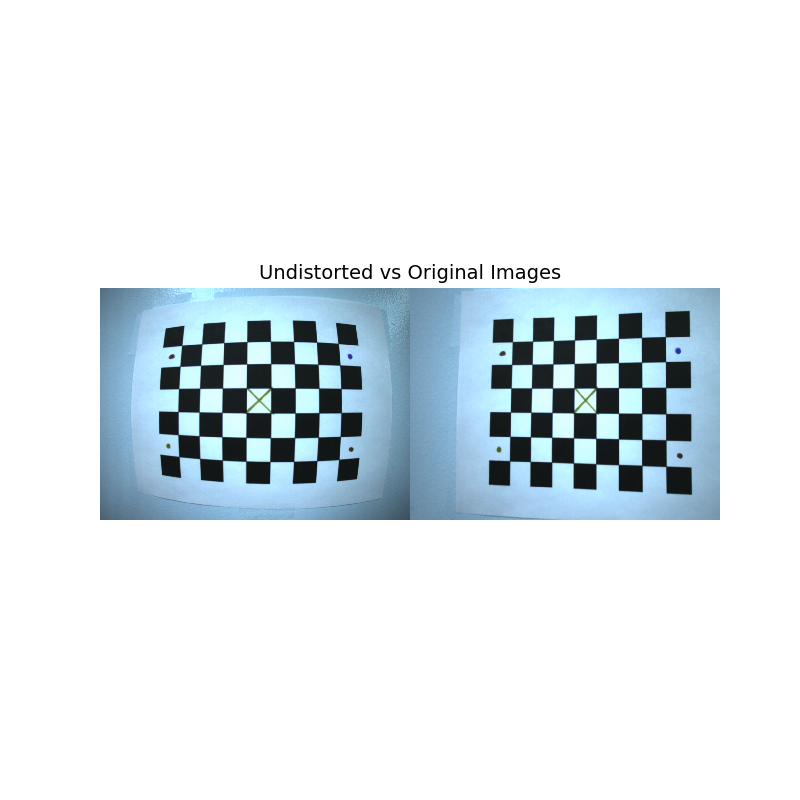

In [18]:
fig = plt.figure(figsize=(8,8))
plt.title('Undistorted vs Original Images', fontsize = 14)
plt.axis('off')
plt.imshow(np.hstack((img,dst)))

In [19]:
plt.close()

# _TODO_ :
1. Add the same functionality with video
2. automate the process
3. Store the camera intrinsic parameters into a config file


In [ ]:
h,  w = gray.shape


newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))



fourcc = 'XVID'
size = (gray.shape[1], gray.shape[0])
out = cv2.VideoWriter(dataPath + 'undistorted_4.avi',cv2.VideoWriter_fourcc(*fourcc), 30, size)
cap = cv2.VideoCapture(dataPath + 'my_video-2.mkv')


while(cap.isOpened()):
#for count in range(2800,3600):
    
    # Uncomment this line if you want to only search for a certain frame number
    #cap.set(1,count);

    #Read the next frame from the video. If you set frame 749 above then the code will return the last frame.
    ret, img = cap.read()
    if ret == False:
        print('End of video frames!')
        break
    # undistort
    dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

    # crop the image if needed!
    #x,y,w,h = roi
    #dst = dst[y:y+h, x:x+w]
    
 
    out.write(dst)
out.release()

In [ ]:
print(gray.shape)
upsampled = cv2.resize(gray, None, fx = 1, fy = 1)
print(upsampled.shape)


#h,  w = gray.shape
h,  w = upsampled.shape
